In [ ]:
# This notebook is use to understand gradient descent in linear regression

In [ ]:
!pip install pandas 

In [1]:
import pandas as pd

df = pd.read_csv('/Users/keru/Downloads/50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].scatter(df['R&D Spend'], df['Administration'])
ax[0].set_title('R&D Spend vs Administration')
ax[1].scatter(df['R&D Spend'], df['Marketing Spend'])
ax[1].set_title('R&D Spend vs Marketing Spend')
ax[2].scatter(df['Administration'], df['Marketing Spend'])
ax[2].set_title('Administration vs Marketing Spend')


In [ ]:
# correlation coefficient 
from sklearn.linear_model import LinearRegression
import numpy as np
model = LinearRegression()
model.fit(df['R&D Spend'].values.reshape(-1,1), df['Marketing Spend'].values)
r = np.sqrt(model.score(df['R&D Spend'].values.reshape(-1,1), df['Marketing Spend'].values))
print(r)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

ax[0].scatter(df['R&D Spend'], df['Profit'])
ax[0].set_title('R&D Spend vs Profit')
ax[1].scatter(df['Administration'], df['Profit'])
ax[1].set_title('Administration vs Profit')
plt.show()

In [ ]:
import seaborn as sns
sns.scatterplot(data=df, x="R&D Spend", y="Profit", hue="State")

In [ ]:
# normal probability plot 
import scipy
y = np.sort([(x - np.mean(df.Profit.values))/np.std(df.Profit.values) for x in df.Profit.values])
f = [(x-0.375)/(df.shape[0]+0.25) for x in df.index.values+1]
zscore = scipy.stats.norm(0,1).ppf(f)
plt.scatter(zscore, y)
plt.title('Normal Probability Plot for Profit')
plt.show()

In [3]:
import numpy as np
# least square solution 
y = df.Profit.values
x = df['R&D Spend'].values
n = df.shape[0]

# normalize 
y_normalizer = np.sqrt(sum(y**2))
y_norm = y/y_normalizer

x_normalizer = np.sqrt(sum(x**2))
x_norm = x/x_normalizer

In [49]:
# least square solution 
b1 = (sum(y_norm*x_norm) - sum(y_norm)*sum(x_norm)/n)/(sum([t**2 for t in x_norm]) - sum(x_norm)*sum(x_norm)/n)
print(b1)
b0 = (sum(y_norm) - b1*sum(x_norm))/n
print(b0)

0.6221874892402971
0.05831688693883927


In [ ]:
def rss(b0, b1, df):
    rss = 0
    for i in range(0, df.shape[0]):
        rss += (df.Profit.values[i] - (b0 * df['R&D Spend'].values[i] + b1)) ** 2
    return rss
grid_b0 = np.linspace(0.5, 1.2, 50)
grid_b1 = np.linspace(45000, 55000, 50)
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
grid_b0, grid_b1 = np.meshgrid(grid_b0, grid_b1)
zs = np.array([rss(x,y, df) for x,y in zip(np.ravel(grid_b0), np.ravel(grid_b1))])
Z = zs.reshape(grid_b0.shape)
ax.plot_surface(grid_b0, grid_b1, Z, rstride=1, cstride=1, color='red', alpha = 0.5)
ax.set_xlabel('b1');ax.set_ylabel('b0');ax.set_zlabel('RSS')              
plt.show()

In [4]:
# gradient descent 
def gradient_descent(b0, b1, stepsize): 
    # calculate gradient descent 
    g_b0 = -2*sum(y_norm-(b0+b1*x_norm))
    g_b1 = -2*sum([(y_i-(b0+b1*x_i))*x_i for x_i, y_i in zip(x_norm, y_norm)])
    # update both b0 and b1
    b1_new = b1 - stepsize*g_b1
    b0_new = b0 - stepsize*g_b0
    return b0_new, b1_new, g_b0, g_b1

Text(0.5, 1.0, 'Gradient Vector Length')

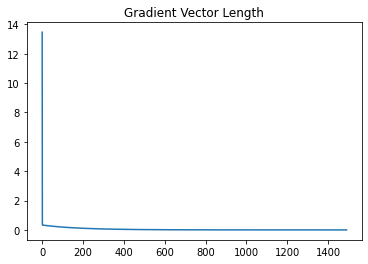

In [54]:
gradient_vector_length = []

# inital stepsize, b0, b1, gradient b0 and gradient b1 at iteration 0 
stepsize = 0.01
b0=0; b1=0
g_b0 = 1; g_b1 = 1

# while not converge (tolerance is 0.0001)
while np.sqrt(g_b0**2 + g_b1**2) > 0.0001:
    # get b0 and b1 at t+1
    b0, b1, g_b0, g_b1 = gradient_descent(b0, b1, stepsize)
    # collect gradient_vector_length for plot
    gradient_vector_length.append(np.sqrt(g_b0**2 + g_b1**2))
    
plt.plot(gradient_vector_length) 
plt.title('Gradient Vector Length')   

In [55]:
print(b0)
print(b1)

0.0583388446887637
0.6220060889560697


In [5]:
# stochastic gradient descent 
def stochastic_gradient_descent(b0, b1, stepsize, yi, xi):
    # calculate gradient for data point i
    g_b0 = -2*(yi-(b0+b1*xi))
    g_b1 = -2*((yi-(b0+b1*xi))*xi)
    # update b0 and b1
    b1_new = b1 - stepsize*g_b1
    b0_new = b0 - stepsize*g_b0
    return b0_new, b1_new, g_b0, g_b1

In [37]:
import sklearn 

df_shuffled=sklearn.utils.shuffle(df)

y = df_shuffled.Profit.values
x = df_shuffled['R&D Spend'].values

# normalize 
y_normalizer = np.sqrt(sum(y**2))
y_norm = y/y_normalizer

x_normalizer = np.sqrt(sum(x**2))
x_norm = x/x_normalizer

In [38]:
import numpy as np
stepsize = [0.5, 0.1, 0.05, 0.01, 0.001]

graident_vector_length_dict = dict()
b1_dict = dict()
b0_dict = dict()
number_of_pass_dict = dict()

In [39]:
for stepsize_i in stepsize:
    
    gradient_vector_length = []
    b0_sgd = []
    b1_sgd = []
    # inital stepsize, b0, b1, gradient b0 and gradient b1 at iteration 0 
    stepsize = stepsize_i
    b0=0; b1=0
    g_b0 = 1; g_b1 = 1
    # while not converge (tolerance is 0.0001)
    satisfied = False
    tol = 0.0001
    number_of_pass = 0
    while satisfied == False:
        # if go over the entire dataframe, then add one
        number_of_pass +=1
        for i in range(df.shape[0]):
            xi = x_norm[i]
            yi = y_norm[i]    
            # get b0 and b1 at t+1
            b0, b1, g_b0, g_b1 = stochastic_gradient_descent(b0, b1, stepsize, yi, xi)
            b0_sgd.append(b0)
            b1_sgd.append(b1)
            # collect gradient_vector_length for plot
            gradient_vector_length.append(np.sqrt(g_b0**2 + g_b1**2))
            # check is gradient vector size is smaller than tolerance 
            satisfied = np.sqrt(g_b0**2 + g_b1**2) < tol
            if satisfied:
                print('gradient vector length is: ', np.sqrt(g_b0**2 + g_b1**2))
                break
                
    graident_vector_length_dict[str(stepsize)] = gradient_vector_length
    b1_dict[str(stepsize)] = np.mean(b1_sgd[200:])
    b0_dict[str(stepsize)] = np.mean(b0_sgd[200:])
    number_of_pass_dict[str(stepsize)] = number_of_pass


gradient vector length is:  2.2369785591231385e-05
gradient vector length is:  2.4113398100190574e-05
gradient vector length is:  7.853230444937208e-05
gradient vector length is:  7.42546601800491e-05
gradient vector length is:  6.000530809129273e-05


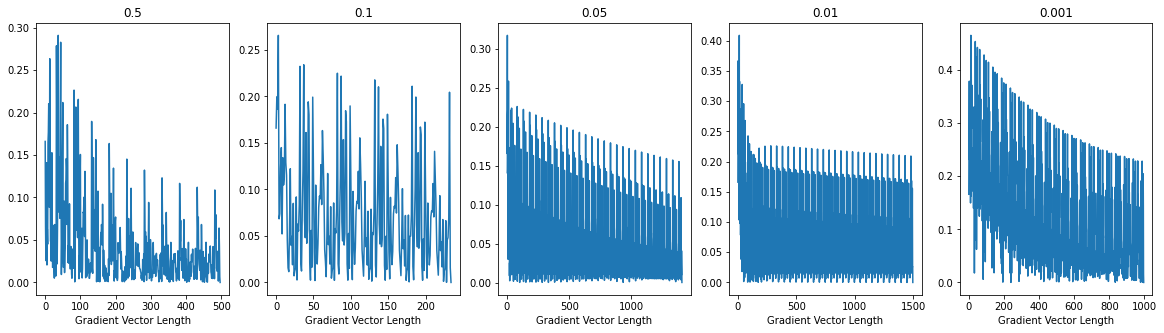

In [46]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,5, figsize=(20,5))

for i, (key, value) in enumerate(graident_vector_length_dict.items()):
    axes[i].plot(value)
    axes[i].set(title=key.upper(), xlabel='Gradient Vector Length')
plt.show()

In [47]:
b0_dict['0.5']

0.06528698208452774

In [48]:
b1_dict['0.5']

0.5647135826267832

In [43]:
number_of_pass_dict

{'0.5': 10, '0.1': 5, '0.05': 29, '0.01': 30, '0.001': 20}